# Logistic Regression Model 
> Section 4.4.3 of Intro to Statistical Learning 
> Used for classification problems 
> Binary either 0 or 1
> Sigmoid aka Logistic function phi(z)=  1/1+e^-z phi(z) always will be b/w 0 & 1 irrespective of the z value 
> Take the solution of Linear regression model and fit it into the logisitic regression model 
> phi(z) will have a cut off point @ 0.5 and anything below 0.5 will be class 0 and anything above 0.5 will be class 1


# Confusion matrix 
> Use a confusion matrix to evaluate the classification models 
> TP - True positive - Predicted Yes Actual Yes
> TN - True Negative - Predicted No Actual No 
> FP - False positive - Predicted Yes Actual No - Type I error
> FN - False Negative - Predicted Np Actual Yes - Type II error - Severe



# Evaluation 
> Accuracy = (TP + TN)/Total = correct prediction overall
> Error rate = (FP + FN)/Total = overall error rate 

In [2]:
# Titanic data set implementation 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

titanic_train = pd.read_csv('titanic_train.csv')
titanic_train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


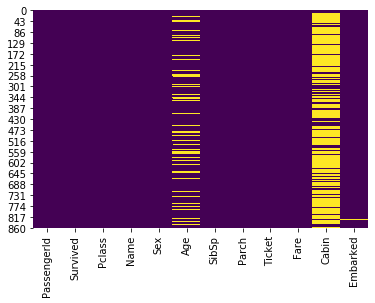

In [4]:
# Basic analysis to id the missing data 
# will get a glimpse of the missing data with a map 

titanic_train.isnull()     # isnull == True value is null 

sns.heatmap(titanic_train.isnull(),cbar=False,cmap='viridis',)

# The columns Age and Cabin are found to have null values => think about using them for analysis 

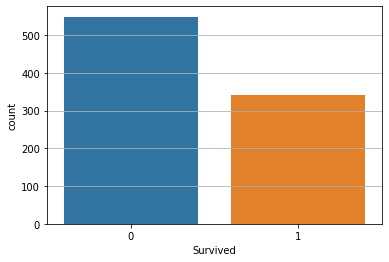

In [5]:
# Find the number of survived 1 - died 0 - column Survived 

sns.countplot(x='Survived',data=titanic_train)
# plt.legend((0,1),('Died','Survived'))
plt.grid(None, axis='y',)

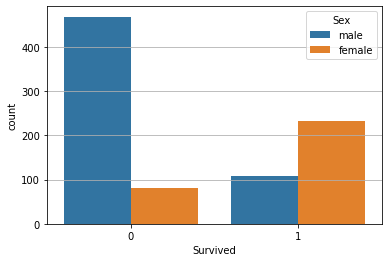

In [6]:
# Find the number of Men and women in the survived and died column
sns.countplot(x='Survived',hue='Sex',data=titanic_train)
plt.grid(None, axis='y')

# => More male died than the female , female survival ratio is more 


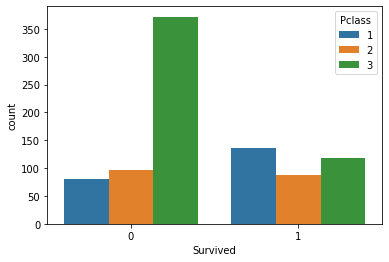

In [7]:
# Id the passenger class influence and the count of each passenger class 
sns.countplot(x='Survived',hue='Pclass',data=titanic_train)

# => Lots of class 3 people died while lots of class 1 ppl survived 

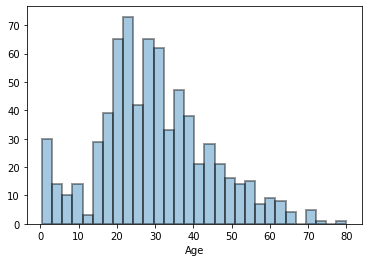

In [8]:
# Analyse the age of people in the titanic 

sns.distplot(titanic_train['Age'].dropna(),bins=30,hist_kws=dict(edgecolor="black", linewidth=2),kde=False)

# => avg around 22-24 died the most

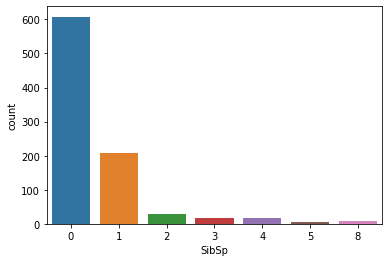

In [9]:
# Analyse the passengers relations in the ship
sns.countplot(x='SibSp',data=titanic_train)

# Most ppl in the ship didnt have a sibling/spouse 

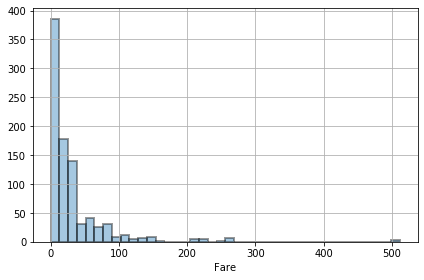

In [10]:
# Analyse the fare column 
sns.distplot(titanic_train['Fare'],bins=40,hist_kws=dict(edgecolor='black',linewidth=2),
             kde=False)
plt.grid(True)
plt.tight_layout()

In [11]:
# use the cufflink to make it more plot interactive
import cufflinks as cf 
cf.go_offline()

titanic_train['Fare'].iplot(kind='hist')

# Logistic Regression Part 2 
> Data cleaning - imputation 'Age' NaN column based on the Passenger class with the avg class 


No handles with labels found to put in legend.


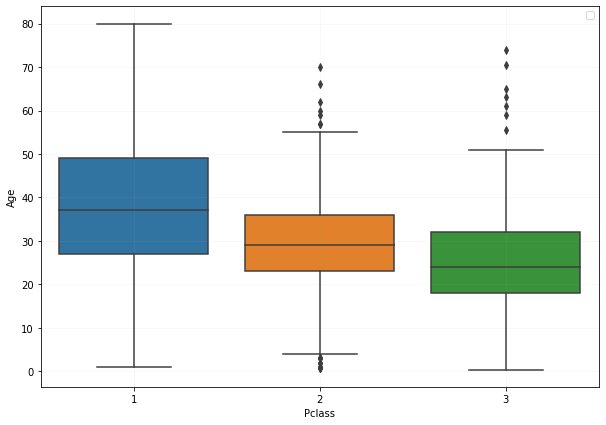

In [12]:
# Replace the NaN age values with the avg age based on the passenger class 

# lets do a box plot 
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age',data=titanic_train)
plt.legend( loc='upper right')
plt.grid(b=None,alpha=0.1)

# => avg age p1,p2  class - seems to be higher than the avg age of the p3 class 

In [13]:
# use pandas to find the avg based on the Pclass 

titanic_train.groupby(by=['Pclass']).mean()['Age']

# => plcass1 = 38.233 pclass2 = 29.87 pclass3 = 25.14

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [14]:
# use the found avg age for the pclass and replace Age NaN values with these values 

# define the function impute 

def impute(cols):
    Age = cols[0]   # refers to the passed Df in the apply 
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29 
        else:
            return 24
    else:
        return Age
            

titanic_train['Age']= titanic_train[['Age','Pclass']].apply(impute,axis=1)

# titanic_train['Age'].isnull()



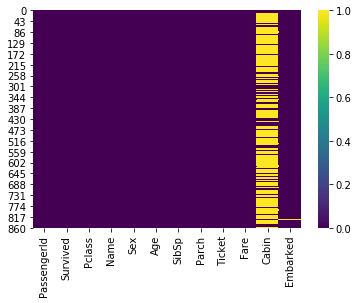

In [15]:
# Check for the Age column having null values now 
sns.heatmap(data=titanic_train.isnull(),cmap='viridis',cbar=True)

# => Age column has been replaced with avg age based on the pclass 


In [16]:
# Too many missing values for the cabin column - lets drop this 

titanic_train.drop('Cabin', axis=1,inplace=True)


In [17]:
titanic_train.head()  # Cabin column gone 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
# Embarked column has a nan value lets drop the value 
titanic_train.dropna(inplace=True)

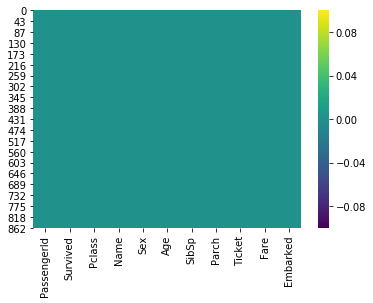

In [19]:
sns.heatmap(data=titanic_train.isnull(),cmap='viridis',cbar=True)

In [20]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
# Dummy indicator variable format for the categorical columns like Sex, Embarked - get_dummies
sex = pd.get_dummies(data=titanic_train['Sex'])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [22]:
sex = pd.get_dummies(data=titanic_train['Sex'],drop_first=True) # drop first column 
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
# Create another dummy indicator variable for Embark column 

embark = pd.get_dummies(data=titanic_train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
# concat these 2 Dummy indicator Dataframes to the titanic train dataframe

tt = pd.concat([titanic_train,sex,embark],axis=1)
tt.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [25]:
# Drop the columns which are encoded into a dummy variable indicator 
tt.drop(['Sex','Embarked','Name','Ticket'], axis=1,inplace=True)


In [26]:
# Drop not useful passengerid which is just an index 
tt.drop('PassengerId',axis=1,inplace=True)

In [27]:
tt.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Passenger class is also a categorical data and lets make it with dummy variable indicator later 

# Logistic Regression Part 3
> train and use a model to predict 

In [28]:
# Consider tt - dataframe as the one solid data - so this would be splitted into test and train data 
# Try cleaning the actual test data given in the csv file and try making it as the test data also 

# Separate the X and y label values 
X = tt.drop('Survived', axis=1)   # not using inplace making it erased totally
y = tt['Survived']                # the one to be predcited 




In [29]:
# import train test split module 
from sklearn.model_selection import train_test_split

In [30]:
# Assign the split
X_train, X_test, y_train, y_test = train_test_split(tt.drop('Survived',axis=1), tt['Survived'], 
                                                    test_size=0.3, random_state=101)

In [31]:
# import the model / algorithm 
from sklearn.linear_model import LogisticRegression

In [32]:
# instantiate the model 
logmodel = LogisticRegression(max_iter=1000)

In [33]:
# Deploy the model on the training data 
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# Predict now 
predictions = logmodel.predict(X_test)

In [35]:
# Evaluate the model 
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [37]:
# Evaluate using the confusion matrix 
from sklearn.metrics import confusion_matrix

In [38]:
print(confusion_matrix(y_test,predictions))

[[150  13]
 [ 32  72]]


In [39]:
TP = confusion_matrix(y_test, predictions)[0][0]
TN = confusion_matrix(y_test, predictions)[0][1]
FP = confusion_matrix(y_test, predictions)[1][0]
FN = confusion_matrix(y_test, predictions)[1][1]
Total = 267

In [40]:
# Lets predict the accuracy 
Accuracy = (TP + TN)/Total
Accuracy

0.6104868913857678

In [41]:
# Lets check the error rate 
Errorate = (FP + FN)/Total
Errorate

0.3895131086142322

In [42]:
# convert the Pclass into dummy variable and rerun the model and evaluate 

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [44]:
pclass = pd.get_dummies(data=tt['Pclass'])
pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [46]:
# concat this into the dataframe and drop the Pclass column 
tt = pd.concat([tt, pclass],axis=1)
tt.drop(labels='Pclass', axis=1, inplace=True)

In [47]:
tt.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,1,2,3,1,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,0,1,0,0,1


In [48]:
# Split and retrain the model 
from sklearn.model_selection import train_test_split
X = tt.drop(labels='Survived', axis=1)
y = tt['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
from sklearn.linear_model import LogisticRegression


In [50]:
newlogmodel = LogisticRegression(max_iter=1000)

In [51]:
newlogmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
newpredict = newlogmodel.predict(X_test)

In [55]:
# Evaluate 
print(classification_report(y_test,newpredict))
print(confusion_matrix(y_test,newpredict))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267

[[150  13]
 [ 33  71]]
